## Tutorial: Generation of conformers using Gecos_Rdkit

Initial molecule and imports:

In [1]:
import gecos
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align, rms
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

PDB file with the initial coordinates and create the object to generate the conformers

In [2]:
pdbfile_ms="/home/jramos/PycharmProjects/GeCos/data/IsoP.pdb"


Visualize the original molecule:

In [3]:
view = nv.show_structure_file(pdbfile_ms)
view.clear_representations()
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view.camera='orthographic'
view

NGLWidget()

# Generation of conformers

## Generation 1

In [4]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=True, logger=None)
mol_kit = g1_pdb_ms.mol_rdkit
nconfs = 50
maxAttempts=1000
pruneRmsThresh=-0.01
useExpTorsionAnglePrefs = False
useBasicKnowledge = True
enforceChirality = True
pattern = "IsoP_rdkit_01"
g1_pdb_ms.generate_conformers(nconfs=nconfs, minimize_iterations=0, pattern=pattern,
                              write_gaussian=False, enforcechirality=enforceChirality,
                              maxattempts=maxAttempts, prunermsthresh=pruneRmsThresh,
                              useexptorsionangleprefs=useExpTorsionAnglePrefs,
                              usebasicknowledge=useBasicKnowledge, ff_name="MMFF",
                              cluster_method="RMSD", cluster_threshold=0.0)


        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

In this case as cluster_threshold parameter is zero, the clustering of conformers based on
"RMSD" is not performed. Thus, 50 conformers are generated

In [5]:
u = mda.Universe(pattern+"_conf_min_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=49)

Allign the trajectory using the first frame as reference and then calculate the rmsd of the trajectory

/home/jramos/PycharmProjects/sandbox_gecos/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


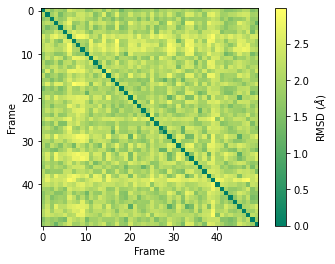

In [6]:
aligner = align.AlignTraj(u, u, select='all', in_memory=True).run()
matrix = diffusionmap.DistanceMatrix(u, select='all').run()
matrix.dist_matrix.shape
plt.imshow(matrix.dist_matrix, cmap='summer')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')

RMSD of all frames in the trajectory

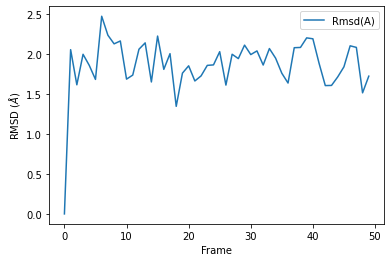

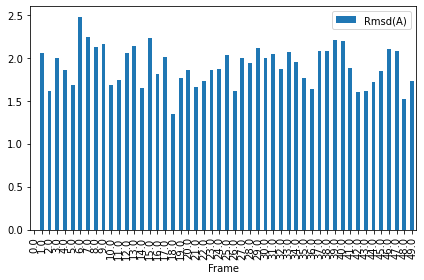

In [7]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='all',  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R.run()
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)','Rmsd(A)'])

ax = df.plot(x='Frame', y='Rmsd(A)', kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

ax = df.plot.bar(x='Frame', y='Rmsd(A)')
plt.tight_layout()

## Generation 2

In [8]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=True, logger=None)
mol_kit = g1_pdb_ms.mol_rdkit
nconfs = 5000
maxAttempts=1000
pruneRmsThresh=0.5
useExpTorsionAnglePrefs = False
useBasicKnowledge = True
enforceChirality = True
pattern = "IsoP_rdkit_02"
g1_pdb_ms.generate_conformers(nconfs=nconfs, minimize_iterations=0, pattern=pattern,
                              write_gaussian=False, enforcechirality=enforceChirality,
                              maxattempts=maxAttempts, prunermsthresh=pruneRmsThresh,
                              useexptorsionangleprefs=useExpTorsionAnglePrefs,
                              usebasicknowledge=useBasicKnowledge, ff_name="MMFF",
                              cluster_method="RMSD", cluster_threshold=0.0)


        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

In this case as cluster_threshold parameter is zero, the clustering of conformers based on
"RMSD" is not performed. Thus, 50 conformers are generated

In [9]:
u = mda.Universe(pattern+"_conf_min_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w

NGLWidget(max_frame=18)

Allign the trajectory using the first frame as reference and then calculate the rmsd of the trajectory

/home/jramos/PycharmProjects/sandbox_gecos/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


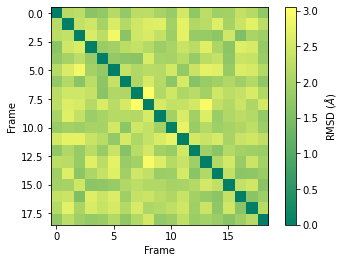

In [10]:
aligner = align.AlignTraj(u, u, select='all', in_memory=True).run()
matrix = diffusionmap.DistanceMatrix(u, select='all').run()
matrix.dist_matrix.shape
plt.imshow(matrix.dist_matrix, cmap='summer')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')

RMSD of all frames in the trajectory

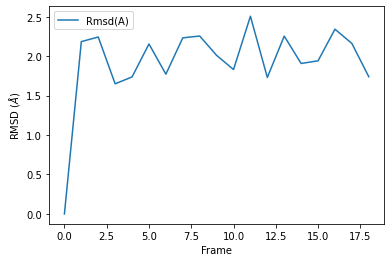

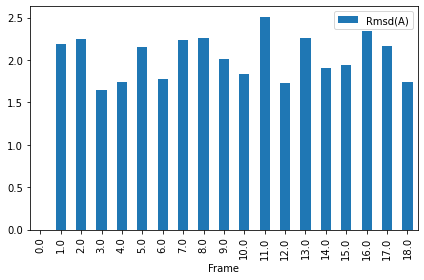

In [11]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='all',  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R.run()
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)','Rmsd(A)'])

ax = df.plot(x='Frame', y='Rmsd(A)', kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

ax = df.plot.bar(x='Frame', y='Rmsd(A)')
plt.tight_layout()

## Generation 3

In [12]:
g1_pdb_ms = gecos.GecosRdkit(filename=pdbfile_ms, bond_perception=True, logger=None)
mol_kit = g1_pdb_ms.mol_rdkit
nconfs = 5000
maxAttempts=1000
pruneRmsThresh=-0.01
useExpTorsionAnglePrefs = False
useBasicKnowledge = True
enforceChirality = True
pattern = "IsoP_rdkit_03"
g1_pdb_ms.generate_conformers(nconfs=nconfs, minimize_iterations=0, pattern=pattern,
                              write_gaussian=False, enforcechirality=enforceChirality,
                              maxattempts=maxAttempts, prunermsthresh=pruneRmsThresh,
                              useexptorsionangleprefs=useExpTorsionAnglePrefs,
                              usebasicknowledge=useBasicKnowledge, ff_name="MMFF",
                              cluster_method="RMSD", cluster_threshold=0.0)


        ***********************************************************************
                           Generation of Conformers (GeCoS)
                         -----------------------------------
                         
                                    Version 0.1
                         
                                  Dr. Javier Ramos
                          Macromolecular Physics Department
                    Instituto de Estructura de la Materia (IEM-CSIC)
                                   Madrid (Spain)
                                   
                GeCoS is an open-source python library to quickly generate
                conformers of small molecules or polymer segments 
                using RdKit and OpenBabel libraries. Once, the
                conformers are generated, QM optimizations and subsequent 
                clustering can be done.
                
                This software is distributed under the terms of the
                GNU General

In this case as cluster_threshold parameter is zero, the clustering of conformers based on
"RMSD" is not performed. Thus, 50 conformers are generated

In [13]:
u = mda.Universe(pattern+"_conf_min_trj.pdb")
mol = u.select_atoms('all')
t = nv.MDAnalysisTrajectory(mol)
w = nv.NGLWidget(t)
w = nv.show_simpletraj(t)
w

NGLWidget(max_frame=4999)

Allign the trajectory using the first frame as reference and then calculate the rmsd of the trajectory

/home/jramos/PycharmProjects/sandbox_gecos/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


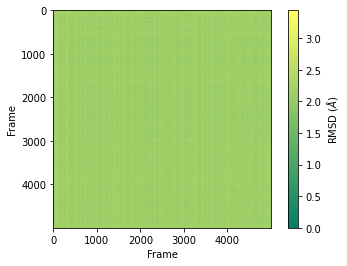

In [14]:
aligner = align.AlignTraj(u, u, select='all', in_memory=True).run()
matrix = diffusionmap.DistanceMatrix(u, select='all').run()
matrix.dist_matrix.shape
plt.imshow(matrix.dist_matrix, cmap='summer')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')

RMSD of all frames in the trajectory

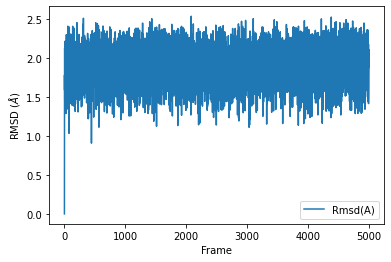

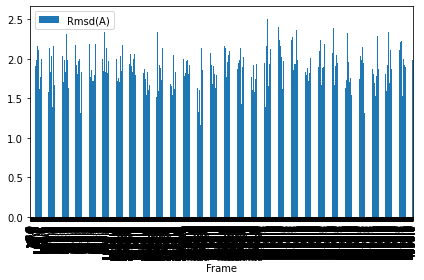

In [15]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='all',  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R.run()
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)','Rmsd(A)'])

ax = df.plot(x='Frame', y='Rmsd(A)', kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

ax = df.plot.bar(x='Frame', y='Rmsd(A)')
plt.tight_layout()